In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

from statsmodels.tsa.statespace.tools import diff

# pip install pmdarima
from pmdarima.arima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

In [2]:
data=pd.read_excel("salesdata.xls")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [5]:
new_colum = data['Ship Date'] - data['Order Date']
data['Days to ship'] = new_colum.dt.days

In [6]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Days to ship
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,5
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,5
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,5


In [7]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [8]:
df=data[data['Category']=='Furniture']
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Days to ship
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,5
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704,3
9964,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320,5
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548,3
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2


In [9]:
#deleting duplicates
print('Size of dataframe before drop_duplicates', df.shape)

data.drop_duplicates(inplace= True)

print('Size of dataframe after drop_duplicates', df.shape)

Size of dataframe before drop_duplicates (2121, 22)
Size of dataframe after drop_duplicates (2121, 22)


In [10]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Days to ship     0
dtype: int64

In [11]:
#Seprating out the categorical and continuous variables
def seperate_data_types(df):
    categorical=[]
    continuous=[]
    for column in data.columns:
        if data[column].nunique () < 100:
            categorical.append(column)
        else:
            continuous.append(column)
    return categorical, continuous

categorical, continuous=seperate_data_types(df)

from tabulate import tabulate

Lable=[categorical, continuous]

print(tabulate({"Categorical":categorical,"continuous": continuous}, headers = ["categorical", "continuous"]))

categorical    continuous
-------------  -------------
Ship Mode      Row ID
Segment        Order ID
Country        Order Date
State          Ship Date
Region         Customer ID
Category       Customer Name
Sub-Category   City
Quantity       Postal Code
Discount       Product ID
Days to ship   Product Name
               Sales
               Profit


In [12]:
continuous.remove("City")
categorical.append("City")

continuous.remove("Customer Name")
categorical.append("Customer Name")

continuous.remove("Product Name")
categorical.append("Product Name")

categorical.remove("Quantity")
continuous.append("Quantity")

categorical.remove("Discount")
continuous.append("Discount")

categorical.remove("Days to ship")
continuous.append("Days to ship")

In [13]:
from tabulate import tabulate
table = [categorical,continuous]
print(tabulate({'categorical':categorical,
                'continuous': continuous}, headers = ['categorical','continuous']))

categorical    continuous
-------------  ------------
Ship Mode      Row ID
Segment        Order ID
Country        Order Date
State          Ship Date
Region         Customer ID
Category       Postal Code
Sub-Category   Product ID
City           Sales
Customer Name  Profit
Product Name   Quantity
               Discount
               Days to ship


In [14]:
print("row and column before removing outliers:",df.shape)

def myoutliers(df,col):
    Q3=np.quantile(data[col],0.75)
    Q1=np.quantile(data[col],0.25)
    
    IQR=Q3-Q1
    
    global mylist
    global my_outlier_df
    
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    
    print('the lower range of',col,"is",lower_range)
    print("the upper range of ",col,"is",upper_range)
    
    mylist=[x for x in df[col] if ((x<lower_range)|(x>upper_range))]
    print("total outliers in",col,"are",len(mylist))
    my_outlier_df=df.loc[df[col].isin(mylist)]
    
k=['Sales','Discount','Profit','Quantity','Days to ship']       


for i in k:
    print("i is ",i)
    myoutliers(df,i)
    print("***************")

row and column before removing outliers: (2121, 22)
i is  Sales
the lower range of Sales is -271.71000000000004
the upper range of  Sales is 498.93
total outliers in Sales are 467
***************
i is  Discount
the lower range of Discount is -0.30000000000000004
the upper range of  Discount is 0.5
total outliers in Discount are 153
***************
i is  Profit
the lower range of Profit is -39.724124999999994
the upper range of  Profit is 70.81687499999998
total outliers in Profit are 627
***************
i is  Quantity
the lower range of Quantity is -2.5
the upper range of  Quantity is 9.5
total outliers in Quantity are 39
***************
i is  Days to ship
the lower range of Days to ship is 0.0
the upper range of  Days to ship is 8.0
total outliers in Days to ship are 0
***************


## Univariate Analysis

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

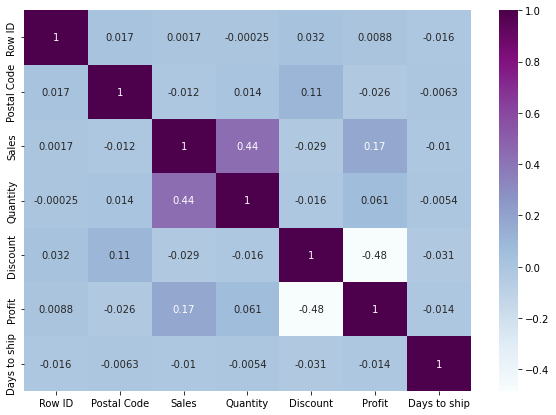

In [16]:
fig,ax=plt.subplots(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap="BuPu")
plt.show()

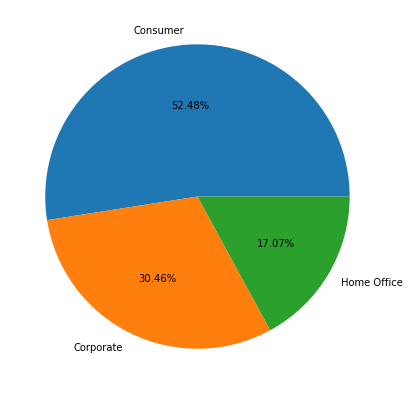

In [17]:
fig, ax=plt.subplots(figsize = (15, 7)) 
percentage=df["Segment"].value_counts() 
labels =list(df["Segment"].value_counts ().index)
plt.pie (percentage,labels=labels, autopct="%0.2f%%")
plt.show()

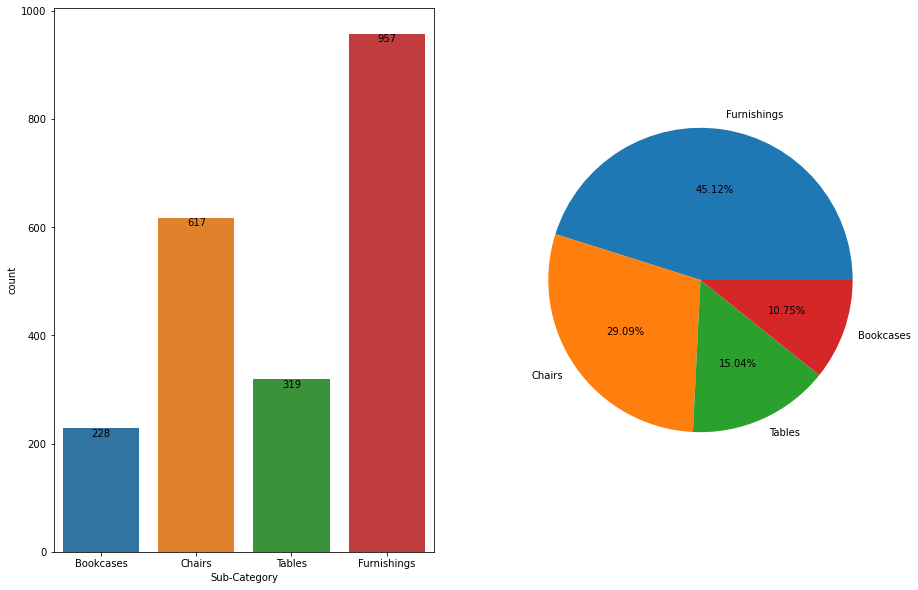

In [18]:


fig, ax=plt.subplots(1, 2, figsize=(15, 10)) 

percentage=df["Sub-Category"].value_counts() 
labels =list(df["Sub-Category"].value_counts().index)  

sns.countplot (x=df["Sub-Category"], ax=ax [0])
plt.pie (percentage, labels=labels, autopct="%0.2f%%") 

for bar in ax[0].patches: 
    count = f"{round((bar.get_height()), 2)}" 
    x = bar.get_x() +bar.get_width() /2 
    y=bar.get_height() 
    ax[0].annotate (count, (x, y), ha = "center", va = "top")
plt.show()

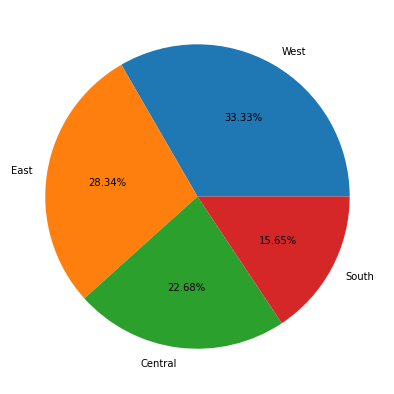

In [19]:
fig, ax=plt.subplots(figsize = (15, 7)) 
percentage=df["Region"].value_counts() 
labels =list(df["Region"].value_counts ().index)
plt.pie (percentage,labels=labels, autopct="%0.2f%%")
plt.show()

In [20]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Days to ship'],
      dtype='object')

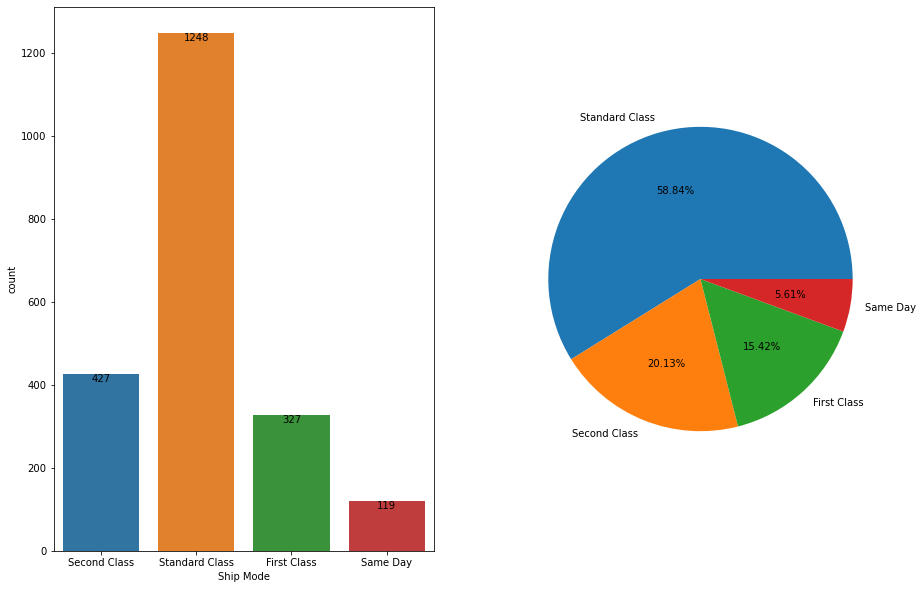

In [21]:
fig, ax=plt.subplots(1, 2, figsize=(15, 10)) 

percentage=df["Ship Mode"].value_counts() 
labels =list(df["Ship Mode"].value_counts().index)  

sns.countplot (x=df["Ship Mode"], ax=ax [0])
plt.pie (percentage, labels=labels, autopct="%0.2f%%") 

for bar in ax[0].patches: 
    count = f"{round((bar.get_height()), 2)}" 
    x = bar.get_x() +bar.get_width() /2 
    y=bar.get_height() 
    ax[0].annotate (count, (x, y), ha = "center", va = "top")
plt.show()

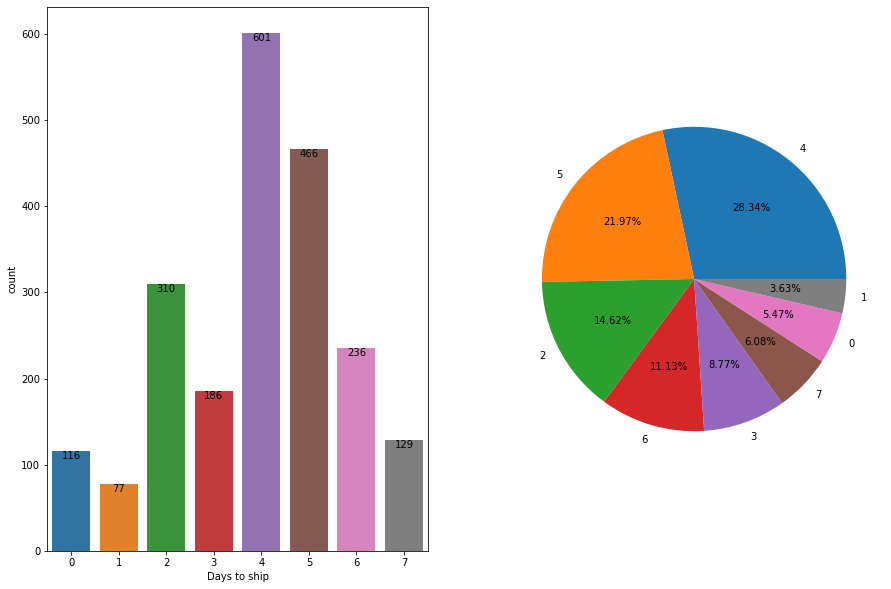

In [22]:
fig, ax=plt.subplots(1, 2, figsize=(15, 10)) 

percentage=df["Days to ship"].value_counts() 
labels =list(df["Days to ship"].value_counts().index)  

sns.countplot (x=df["Days to ship"], ax=ax [0])
plt.pie (percentage, labels=labels, autopct="%0.2f%%") 

for bar in ax[0].patches: 
    count = f"{round((bar.get_height()), 2)}" 
    x = bar.get_x() +bar.get_width() /2 
    y=bar.get_height() 
    ax[0].annotate (count, (x, y), ha = "center", va = "top")
plt.show()

## Bi-variate Analysis

fig,ax=plt.subplots(2,2,figsize=(15,10))
sns.countplot(x='Region',hue='Sales',data=data,ax=ax[0,0])
ax[0,0].set_title('')
sns.countplot(x='Category',hue='Sales',data=data,ax=ax[0,1])
ax[0,1].set_title('')
sns.countplot(x='Ship Mode',hue='Sales',data=data,ax=ax[1,0])
#ax[1,0].set_title('')
#sns.countplot(x='Segment',hue='Sales',data=data,ax=ax[1,1])
ax[1,1].set_title('')
plt.show() 

In [23]:
def annotate(bars,ax=ax):
    for bar in bars:
        height = bar.get_height()
        height = round(height,2)
        label_x_pos = bar.get_x() + bar.get_width() / 2
        ax.text(label_x_pos, height, s=f'{height}', ha='center',
        va='bottom')

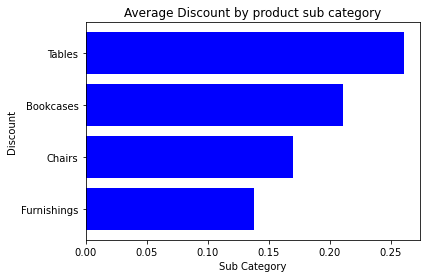

In [24]:
df_1 = df.groupby('Sub-Category')['Discount'].mean().sort_values()

plt.barh(df_1.index, df_1.values,color = 'b')
    
plt.title('Average Discount by product sub category')
plt.xlabel('Sub Category')
plt.ylabel('Discount')
plt.show()

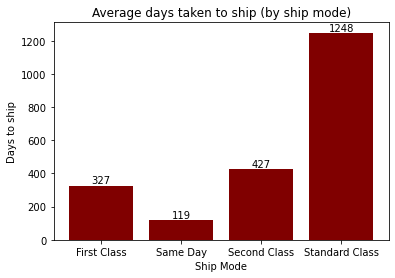

In [25]:
df_1 = df.groupby('Ship Mode')['Days to ship'].count()
plt.bar(df_1.index, df_1.values,color = 'g')

bars = plt.bar(df_1.index, df_1.values,color = 'maroon')
annotate(bars,plt)
    
plt.title('Average days taken to ship (by ship mode)')
plt.xlabel('Ship Mode')
plt.ylabel('Days to ship')
plt.show()

df_2 = df.groupby('Category')['Sales'].mean()

fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(df_2.index, df_1.values)
annotate(bars,ax)
    
plt.title('Sales amount for each category  ')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

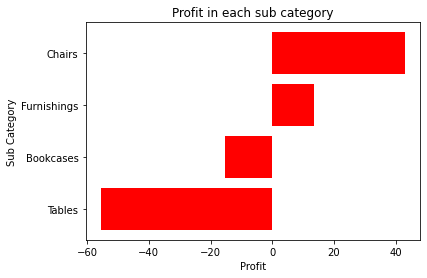

In [26]:
df_2 = df.groupby('Sub-Category')['Profit'].mean().sort_values()

plt.barh(df_2.index, df_2.values,color = 'r')
    
plt.title('Profit in each sub category')
plt.xlabel('Profit')
plt.ylabel('Sub Category')
plt.show()

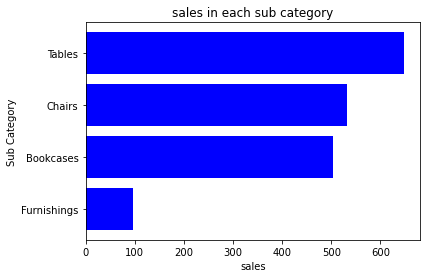

In [27]:
df_2 = df.groupby('Sub-Category')['Sales'].mean().sort_values()

plt.barh(df_2.index, df_2.values,color = 'b')
    
plt.title('sales in each sub category')
plt.xlabel('sales')
plt.ylabel('Sub Category')
plt.show()

## Multi-Variate Analysis:

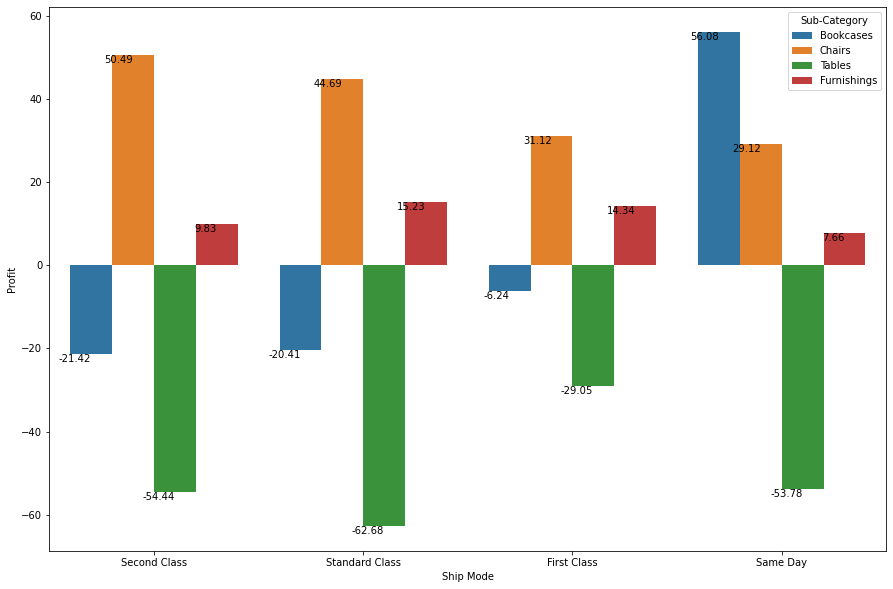

In [28]:
fig,ax= plt.subplots(figsize=(15,10))

sns.barplot(x=df['Ship Mode'],y=df['Profit'],hue=df['Sub-Category'],ci=None,ax=ax)
count=len(df['Ship Mode'])

for bar in ax.patches:
    count = f"{round((bar.get_height()), 2)}"
    x = bar.get_x() +bar.get_width() /2
    y=bar.get_height()
    ax.annotate (count, (x, y), ha = "right", va = "top")
plt.show()

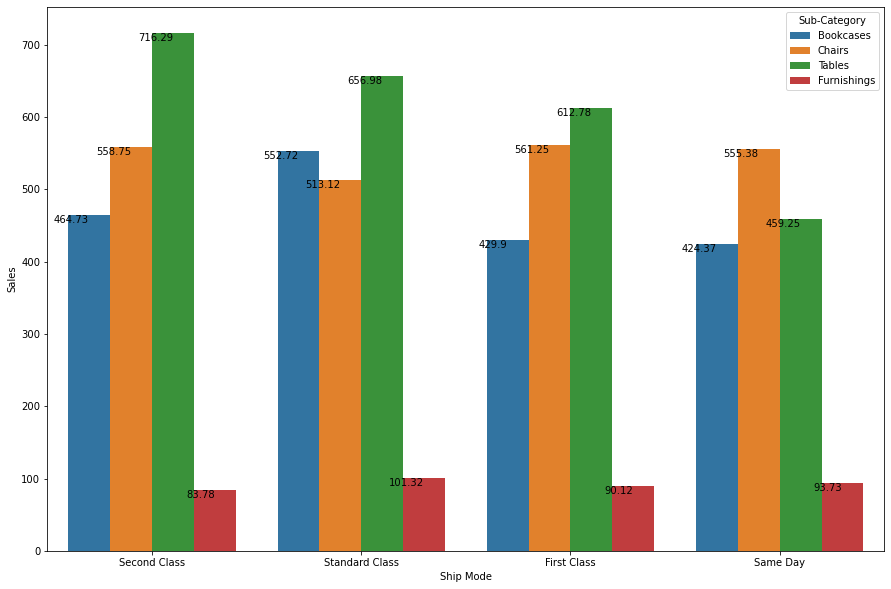

In [29]:
fig,ax= plt.subplots(figsize=(15,10))

sns.barplot(x=df['Ship Mode'],y=df['Sales'],hue=df['Sub-Category'],ci=None,ax=ax)
count=len(df['Ship Mode'])

for bar in ax.patches:
    count = f"{round((bar.get_height()), 2)}"
    x = bar.get_x() +bar.get_width() /2
    y=bar.get_height()
    ax.annotate (count, (x, y), ha = "right", va = "top")
plt.show()

In [30]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Days to ship
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7


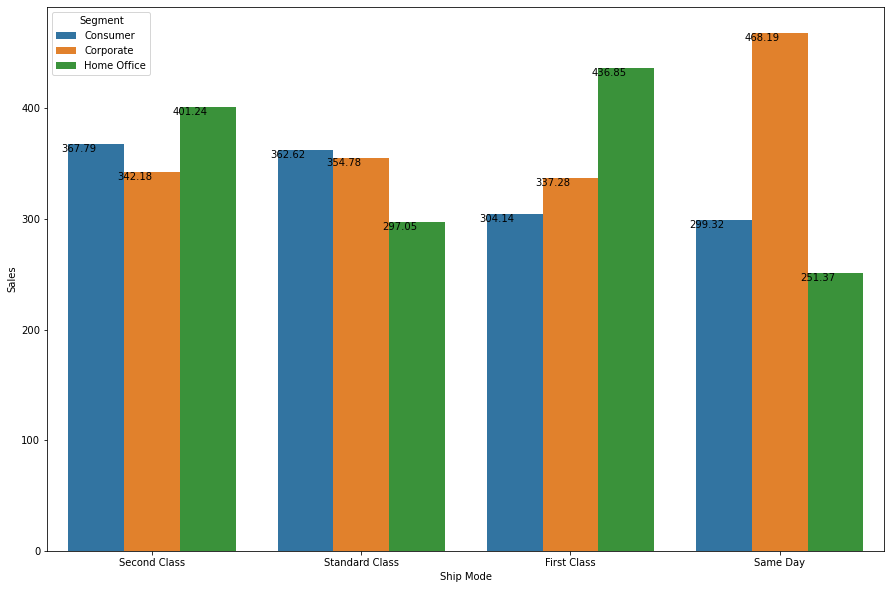

In [31]:
fig,ax= plt.subplots(figsize=(15,10))

sns.barplot(x=df['Ship Mode'],y=df['Sales'],hue=df['Segment'],ci=None,ax=ax)
count=len(df['Ship Mode'])

for bar in ax.patches:
    count = f"{round((bar.get_height()), 2)}"
    x = bar.get_x() +bar.get_width() /2
    y=bar.get_height()
    ax.annotate (count, (x, y), ha = "right", va = "top")
plt.show()

In [32]:
data1 = data.set_index('Order Date')
data1 = data1.sort_index()
data1

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Days to ship
Order Date,,,,,,,,,,,,,,,,,,,,,
2014-01-03,7981,CA-2014-103800,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,...,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,4
2014-01-04,740,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,4
2014-01-04,741,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,4
2014-01-04,742,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,4
2014-01-05,1760,CA-2014-141817,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,...,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,5092,CA-2017-156720,2018-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,...,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,4
2017-12-30,909,CA-2017-143259,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,...,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,4
2017-12-30,908,CA-2017-143259,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,...,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,4


In [33]:
sales = data1[data1['Category'] == 'Furniture']['Sales'].resample('M').mean()

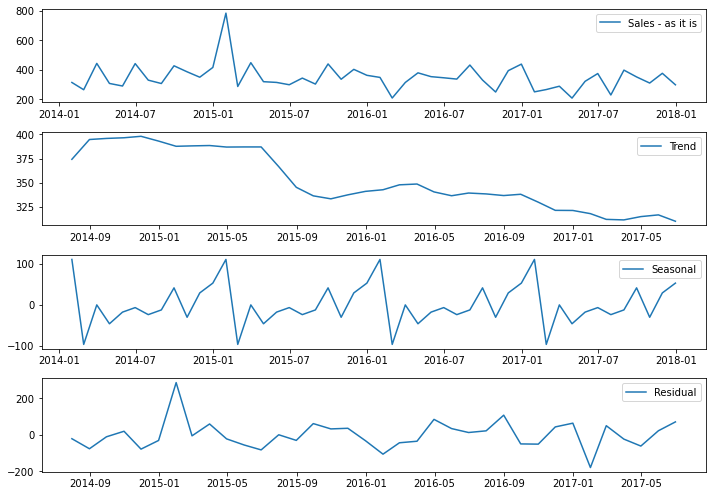

In [34]:
decomposition=seasonal_decompose(sales)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(10,7))

plt.subplot(411)
plt.plot(sales,label='Sales - as it is')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

<AxesSubplot:xlabel='Order Date'>

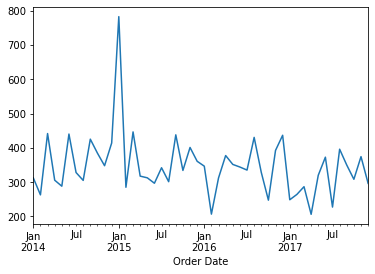

In [35]:
sales.plot()

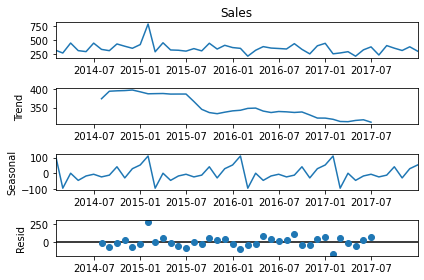

In [36]:
seasonal_decompose(sales).plot();

In [37]:
# dickey-fuller test for stationarity
def checkStationarity():
    pvalue = adfuller(sales)[1]
    '''
    output:-> 
    1) test statistic, 
    2) p-value, 
    3) number of lags, 
    4) total observations
    
    '''
    
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)
        
    return(msg)

In [38]:
res = adfuller(sales)
if res[1] < 0.05:
    print('data is stationary')
else:
    print('data is not stationary')
print(res[1])

data is stationary
9.093398510006677e-10


## Moving Average

In [39]:
lags = 4
moving_avg = sales.rolling(window=lags).mean()

In [40]:
df_ts = pd.DataFrame({'actual':sales, 'ma':moving_avg})
print(df_ts)

                actual          ma
Order Date                        
2014-01-31  312.126250         NaN
2014-02-28  262.808286         NaN
2014-03-31  441.635030         NaN
2014-04-30  305.570654  330.535055
2014-05-31  288.032792  324.511690
2014-06-30  440.204187  368.860666
2014-07-31  327.910636  340.429567
2014-08-31  305.014437  340.290513
2014-09-30  425.294300  374.605890
2014-10-31  384.507719  360.681773
2014-11-30  347.820527  365.659246
2014-12-31  414.134682  392.939307
2015-01-31  782.662773  482.281425
2015-02-28  284.943091  457.390269
2015-03-31  446.420821  482.040342
2015-04-30  317.445409  457.868024
2015-05-31  312.498350  340.326918
2015-06-30  296.699192  343.265943
2015-07-31  341.860500  317.125863
2015-08-31  301.206006  313.066012
2015-09-30  437.883717  344.412354
2015-10-31  334.072875  353.755774
2015-11-30  401.049773  368.553093
2015-12-31  360.715925  383.430572
2016-01-31  346.488318  360.581723
2016-02-29  206.607947  328.715491
2016-03-31  312.2217

In [41]:
df_ts.actual.head(lags).mean()

330.53505496586746

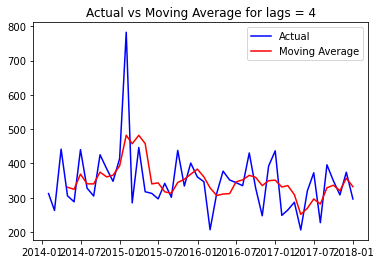

In [42]:
# plot the actual and moving average for comparison
plt.plot(df_ts.actual, color='blue',label = 'Actual')
plt.plot(df_ts.ma, color='red', label = 'Moving Average')
plt.title('Actual vs Moving Average for lags = ' + str(lags))
plt.legend()
plt.show()

## Exponential Smoothing

### Simple Exponent Smoothing (no trend/seasonality)

In [43]:
# Simple Exponent - when there is no trend/seasonality
def simplesmoothing(sales,alpha):
    model = SimpleExpSmoothing(sales).fit(smoothing_level=alpha,optimized=False)
    pdct = model.fittedvalues
    df = pd.DataFrame({'actual':sales, 'forecast':pdct})
    return(model,df)

In [44]:
d_simple_exp = {}
forecast = {}

alphas = [0, 0.2, 0.6, 0.8]

for a in alphas:
    model, df = simplesmoothing(sales,a)
    d_simple_exp[a] = df.forecast
    forecast[a] = model.forecast(12)

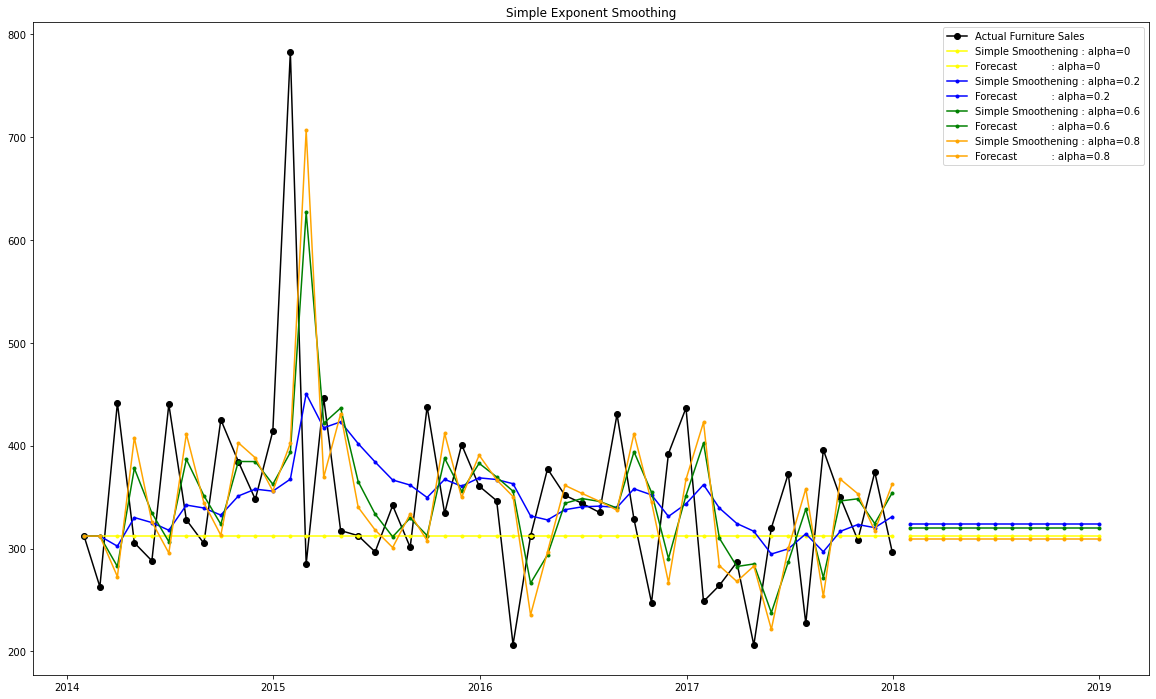

In [45]:
colors = ['yellow','blue','green','orange']

# plot the actual and forecast data
fig,ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(sales, marker='o', color='black',label='Actual Furniture Sales')

for i in range(len(alphas)):
    plt.plot(d_simple_exp[alphas[i]],marker='.',color=colors[i],label='Simple Smoothening : alpha=' + str(alphas[i]))
    plt.plot(forecast[alphas[i]],marker='.',color=colors[i],label=    'Forecast           : alpha=' + str(alphas[i]))

plt.title('Simple Exponent Smoothing')
plt.legend()
plt.show()

## Double Exponent Smoothing (trend, but no seasonality)

Text(0.5, 1.0, 'Double Exponent Smoothing')

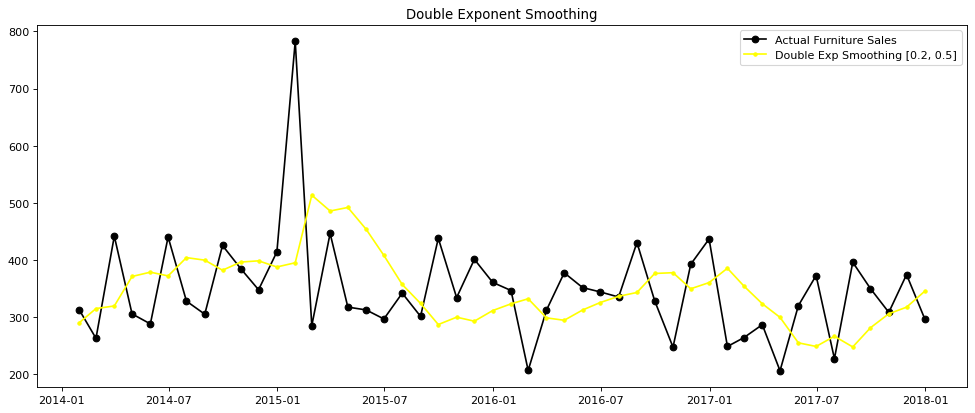

In [46]:
# Double Exponent - when there is a trend, no seasonality (Holts' method) 
# parameters: alpha, beta

model = ExponentialSmoothing(sales,trend='additive').fit(smoothing_level=0.2, smoothing_slope=0.5)

# forecast with double exponent smoothing
f_dexp = model.fittedvalues

# plot the actual and smooth data
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(sales,marker='o',color='black',label='Actual Furniture Sales')
plt.plot(f_dexp, marker='.',color='yellow',label='Double Exp Smoothing [0.2, 0.5]')
plt.legend()
plt.title('Double Exponent Smoothing')

In [47]:
model.forecast(12)

2018-01-31    347.436931
2018-02-28    359.257126
2018-03-31    371.077320
2018-04-30    382.897515
2018-05-31    394.717709
2018-06-30    406.537904
2018-07-31    418.358098
2018-08-31    430.178293
2018-09-30    441.998488
2018-10-31    453.818682
2018-11-30    465.638877
2018-12-31    477.459071
Freq: M, dtype: float64

Text(0.5, 1.0, 'Double Exponent Smoothing')

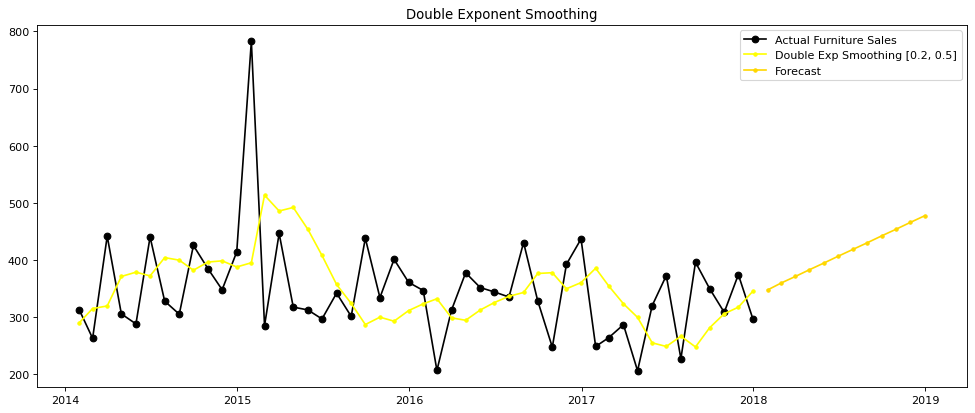

In [48]:
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(sales,marker='o',color='black',label='Actual Furniture Sales')
plt.plot(f_dexp, marker='.',color='yellow',label='Double Exp Smoothing [0.2, 0.5]')
plt.plot(model.forecast(12), marker='.',color='gold',label='Forecast')
plt.legend()
plt.title('Double Exponent Smoothing')

## Triple Exponent Smoothing (trend and seasonality)

Text(0.5, 1.0, 'Triple Exponent Smoothing')

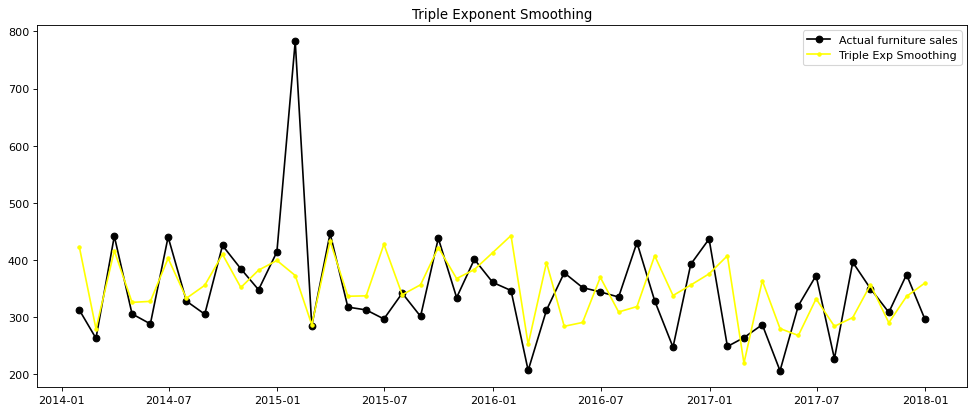

In [49]:
# build model
model = ExponentialSmoothing(sales,trend='add',seasonal='add',seasonal_periods=12).fit()

# plot the actual and triple smoothing values
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(sales, marker='o',color='black',label='Actual furniture sales')
plt.plot(model.fittedvalues,marker='.',color='yellow',label='Triple Exp Smoothing')
plt.legend()
plt.title('Triple Exponent Smoothing')

In [50]:
model

In [51]:
model.forecast(12)

2018-01-31    347.153568
2018-02-28    202.795475
2018-03-31    324.876442
2018-04-30    247.724788
2018-05-31    261.289181
2018-06-30    320.010770
2018-07-31    253.883620
2018-08-31    297.586156
2018-09-30    331.513093
2018-10-31    269.331717
2018-11-30    316.992135
2018-12-31    331.282800
Freq: M, dtype: float64

Text(0.5, 1.0, 'Triple Exponent Smoothing')

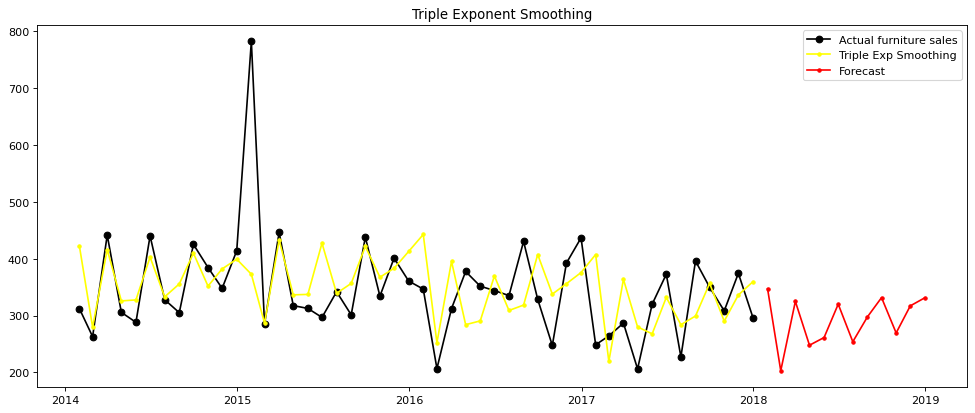

In [52]:
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(sales, marker='o',color='black',label='Actual furniture sales')
plt.plot(model.fittedvalues,marker='.',color='yellow',label='Triple Exp Smoothing')
plt.plot(model.forecast(12),marker='.',color='r',label='Forecast')

plt.legend()
plt.title('Triple Exponent Smoothing')

In [53]:
# Stationarity check
res = adfuller(sales)
if res[1] < 0.05:
    print('data is stationary')
else:
    print('data is not stationary')
print(res[1])

data is stationary
9.093398510006677e-10


In [54]:
# forecast
model.forecast(10)

2018-01-31    347.153568
2018-02-28    202.795475
2018-03-31    324.876442
2018-04-30    247.724788
2018-05-31    261.289181
2018-06-30    320.010770
2018-07-31    253.883620
2018-08-31    297.586156
2018-09-30    331.513093
2018-10-31    269.331717
Freq: M, dtype: float64

In [55]:

sales=pd.DataFrame(model.fittedvalues)
sales.rename(columns = {0:'Sales'}, inplace = True)

In [56]:
sales

,Sales
Order Date,
2014-01-31,422.046429
2014-02-28,279.351025
2014-03-31,416.156973
2014-04-30,325.718400
2014-05-31,327.500263
2014-06-30,402.848514
2014-07-31,332.896952
2014-08-31,355.636713
2014-09-30,409.762092


## Time Series Using ACF and PACF

### Plot ACF and PACF

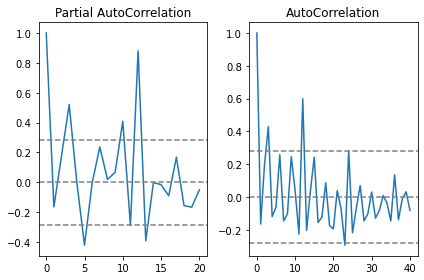

In [57]:
# p -> PACF (partial autocorrelation graph)
# q -> ACF (auto correlation graph)
# d -> differential level (from top)

# since, lags cannot be determined at the beginning, set a random number initially

lag_acf = acf(sales, nlags=40)
lag_pacf = pacf(sales, nlags=20, method='ols')

# plot PACF (p)
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(sales)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(sales)),linestyle='--',color="gray")
plt.title("Partial AutoCorrelation")

# plot ACF (q)
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(sales)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(sales)),linestyle='--',color="gray")
plt.title("AutoCorrelation")

plt.tight_layout()

### Split the data into a 80:20 ratio

In [58]:
ss = int(0.8 * len(sales))

train = sales.iloc[:ss]
test = sales.iloc[ss:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 38, test = 10


### Build the ARMA Model

In [59]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

# pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [60]:
for p in range(3):
    for q in range(3):
        try:
            m1 = ARIMA(train,order=(p,0,q)).fit()
            print('ARIMA(',p,',',str(0),',',q,') - AIC :',m1.aic)
        except:
            continue

ARIMA( 0 , 0 , 0 ) - AIC : 413.5932807870974
ARIMA( 0 , 0 , 1 ) - AIC : 411.2697865946336
ARIMA( 0 , 0 , 2 ) - AIC : 402.59462029229945
ARIMA( 1 , 0 , 0 ) - AIC : 410.2601592842433
ARIMA( 1 , 0 , 1 ) - AIC : 412.19534065280646
ARIMA( 1 , 0 , 2 ) - AIC : 404.5616515377886
ARIMA( 2 , 0 , 0 ) - AIC : 412.0486509362093
ARIMA( 2 , 0 , 1 ) - AIC : 413.99133988907784
ARIMA( 2 , 0 , 2 ) - AIC : 402.88978349069146


In [61]:
# start with initial values for p and q
p=1; q=1
m1 = ARIMA(train,order=(p,0,q)).fit()
print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   38
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -202.098
Date:                Thu, 12 May 2022   AIC                            412.195
Time:                        01:48:49   BIC                            418.746
Sample:                    01-31-2014   HQIC                           414.526
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        359.6945      6.159     58.398      0.000     347.622     371.767
ar.L1         -0.3482      0.588     -0.592      0.554      -1.501       0.805
ma.L1         -0.0636      0.551     -0.115      0.9

In [62]:
# predictions
predictions = m1.predict(0,len(test)-1)
print(predictions)

Order Date
2014-01-31    359.694548
2014-02-28    334.659216
2014-03-31    391.185753
2014-04-30    338.446102
2014-05-31    372.334541
2014-06-30    373.756401
2014-07-31    342.817930
2014-08-31    369.656457
2014-09-30    361.999269
2014-10-31    339.223001
Freq: M, Name: predicted_mean, dtype: float64


In [63]:
start = len(train) 
end = len(train) + len(test) - 1

print('start = {}, end = {}'.format(start,end))

start = 38, end = 47


       actual   predicted         err
0  363.767582  359.694548    4.073034
1  279.915544  334.659216  -54.743672
2  267.779794  391.185753 -123.405958
3  331.964914  338.446102   -6.481188
4  283.839497  372.334541  -88.495045
5  299.142235  373.756401  -74.614166
6  356.573799  342.817930   13.755870
7  290.053363  369.656457  -79.603094
8  336.181501  361.999269  -25.817768
9  359.606774  339.223001   20.383773


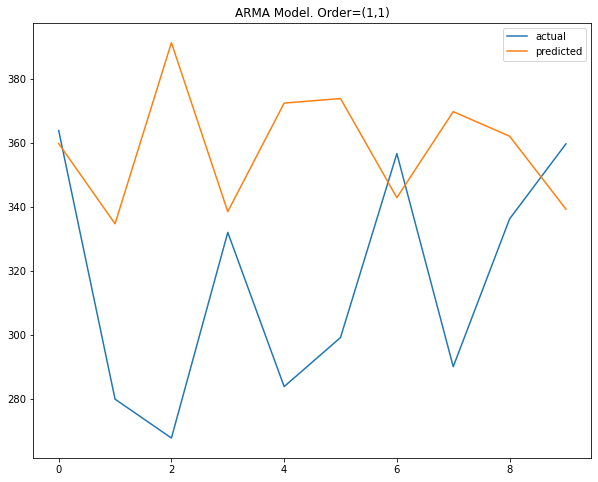

In [64]:
actual = []; pred = []

for i in range(len(predictions)):
    actual.append(test["Sales"][i])
    pred.append(predictions[i])

df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

msg = 'ARMA Model. Order=(' + str(p) + ',' + str(q) + ')'
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)
plt.show()

In [65]:
### Perform the LJung-Box test


# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

[0.9403807]
Fail-to-Reject H0. Good model


In [66]:
### Calculate MSE and RMSE of the Model from the test

# MSE
# RMSE
msg = 'ARMA Model. Order=(' + str(p) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

print(df_res)

ARMA Model. Order=(1,1)
	MSE = 3929.1074180094683
	RMSE = 62.682592623546356
       actual   predicted         err
0  363.767582  359.694548    4.073034
1  279.915544  334.659216  -54.743672
2  267.779794  391.185753 -123.405958
3  331.964914  338.446102   -6.481188
4  283.839497  372.334541  -88.495045
5  299.142235  373.756401  -74.614166
6  356.573799  342.817930   13.755870
7  290.053363  369.656457  -79.603094
8  336.181501  361.999269  -25.817768
9  359.606774  339.223001   20.383773


2018-01-31    348.199083
2018-02-28    350.593422
2018-03-31    349.801611
2018-04-30    350.063464
2018-05-31    349.976869
2018-06-30    350.005506
2018-07-31    349.996036
2018-08-31    349.999167
2018-09-30    349.998132
2018-10-31    349.998474
2018-11-30    349.998361
2018-12-31    349.998398
2019-01-31    349.998386
Freq: M, Name: predicted_mean, dtype: float64


Text(0.5, 1.0, 'ARMA Model. Order=(1,1)')

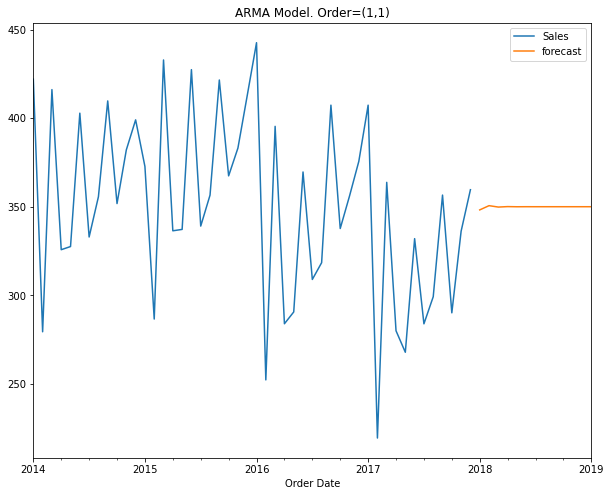

In [67]:
p = 1;  q = 1 ;d=0
m1_f = ARIMA(sales,order=(p,d,q)).fit()
fcast = m1_f.predict(start=len(sales), end=len(sales)+12, typ='levels')
print(fcast)

sales.plot(figsize=(10,8),legend=True)
fcast.plot(legend=True,label='forecast')
plt.title(msg)

### Build the ARIMA model

In [68]:
for p in range(3):
    for q in range(3):
        for d in range(2):
            try:
                m2 = ARIMA(train,order=(p,d,q)).fit()
                print('ARIMA(',p,',',d,',',q,') - AIC :',m2.aic)
            except:
                continue

ARIMA( 0 , 0 , 0 ) - AIC : 413.5932807870974
ARIMA( 0 , 1 , 0 ) - AIC : 434.63339033860456
ARIMA( 0 , 0 , 1 ) - AIC : 411.2697865946336
ARIMA( 0 , 1 , 1 ) - AIC : 407.3882012947591
ARIMA( 0 , 0 , 2 ) - AIC : 402.59462029229945
ARIMA( 0 , 1 , 2 ) - AIC : 405.4777026748144
ARIMA( 1 , 0 , 0 ) - AIC : 410.2601592842433
ARIMA( 1 , 1 , 0 ) - AIC : 418.6238663546975
ARIMA( 1 , 0 , 1 ) - AIC : 412.19534065280646
ARIMA( 1 , 1 , 1 ) - AIC : 404.54950504338217
ARIMA( 1 , 0 , 2 ) - AIC : 404.5616515377886
ARIMA( 1 , 1 , 2 ) - AIC : 406.5010861280712
ARIMA( 2 , 0 , 0 ) - AIC : 412.0486509362093
ARIMA( 2 , 1 , 0 ) - AIC : 400.5483102577904
ARIMA( 2 , 0 , 1 ) - AIC : 413.99133988907784
ARIMA( 2 , 1 , 1 ) - AIC : 401.7648069990014
ARIMA( 2 , 0 , 2 ) - AIC : 402.88978349069146
ARIMA( 2 , 1 , 2 ) - AIC : 398.9161080182123


In [69]:
# start with initial values for p and q based on auto_arima recommendation
p=2; d=1; q=0
m2 = ARIMA(sales,order=(p,d,q)).fit()
print(m2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -246.699
Date:                Thu, 12 May 2022   AIC                            499.397
Time:                        01:48:52   BIC                            504.947
Sample:                    01-31-2014   HQIC                           501.486
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0872      0.141     -7.691      0.000      -1.364      -0.810
ar.L2         -0.6750      0.128     -5.287      0.000      -0.925      -0.425
sigma2      2045.9287    333.064      6.143      0.0

#### Predict the test data using the model

In [70]:
# predictions
start = len(train) 
end = len(train) + len(test) - 1

print('start = {}, end = {}'.format(start,end))

predictions = m2.predict(start,end,typ='levels')
print(predictions)

start = 38, end = 47
Order Date
2017-03-31    402.356990
2017-04-30    333.662277
2017-05-31    273.575251
2017-06-30    337.577978
2017-07-31    270.374058
2017-08-31    292.834261
2017-09-30    314.991748
2017-10-31    283.803262
2017-11-30    323.606438
2017-12-31    330.934656
Freq: M, Name: predicted_mean, dtype: float64


## Collate actual, predicted, and error values together

start = 38, end = 47
                actual   predicted        err
Order Date                                   
2017-03-31  363.767582  402.356990 -38.589408
2017-04-30  279.915544  333.662277 -53.746733
2017-05-31  267.779794  273.575251  -5.795457
2017-06-30  331.964914  337.577978  -5.613064
2017-07-31  283.839497  270.374058  13.465439
2017-08-31  299.142235  292.834261   6.307974
2017-09-30  356.573799  314.991748  41.582051
2017-10-31  290.053363  283.803262   6.250100
2017-11-30  336.181501  323.606438  12.575063
2017-12-31  359.606774  330.934656  28.672118


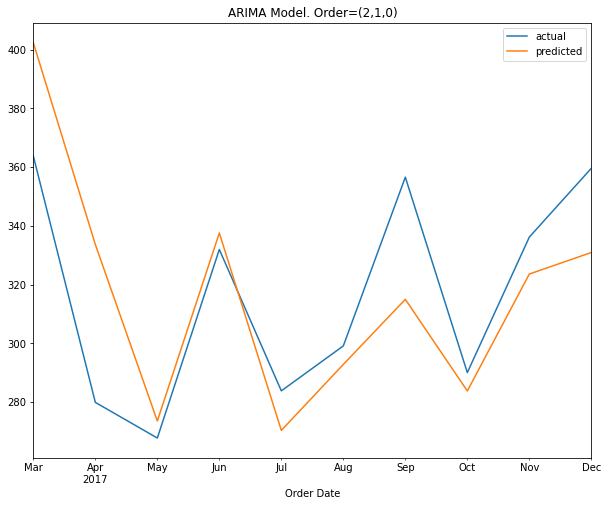

In [71]:
# predictions
start = len(train) 
end = len(train) + len(test) - 1

print('start = {}, end = {}'.format(start,end))

predictions = m2.predict(start,end,typ='levels')

df_res = pd.DataFrame({'actual':actual, 'predicted':predictions})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

msg = 'ARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)
plt.show()

In [72]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m2.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [73]:
# MSE
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARIMA Model. Order=(2,1,0)
	MSE = 741.2409418603236
	RMSE = 27.225740428137552


Text(0.5, 1.0, 'ARIMA Model. Order=(2,1,0)')

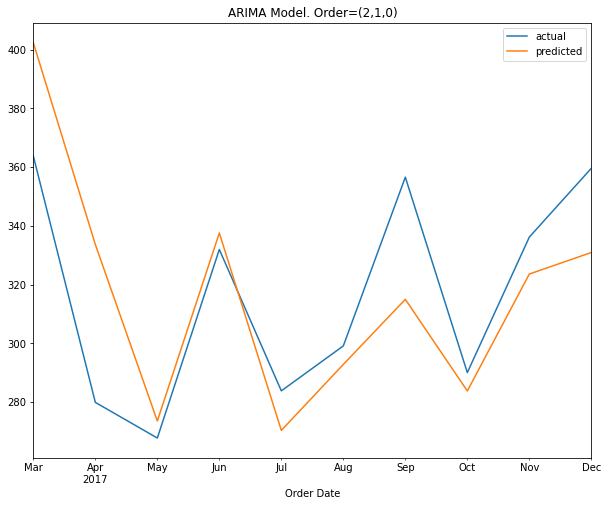

In [74]:
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)

### Forecast the future data using the model

In [75]:
# forecast into the future
m2_1 = ARIMA(sales,order=(p,d,q)).fit()
fcast = m2_1.predict(start=len(sales), end=len(sales)+11, typ='levels')
print(fcast)

2018-01-31    302.999827
2018-02-28    348.730626
2018-03-31    337.223709
2018-04-30    318.863798
2018-05-31    346.592678
2018-06-30    328.839204
2018-07-31    329.422775
2018-08-31    340.772725
2018-09-30    328.038948
2018-10-31    334.221564
2018-11-30    336.095618
2018-12-31    329.884565
Freq: M, Name: predicted_mean, dtype: float64


Text(0.5, 1.0, 'ARIMA Model. Order=(2,1,0)')

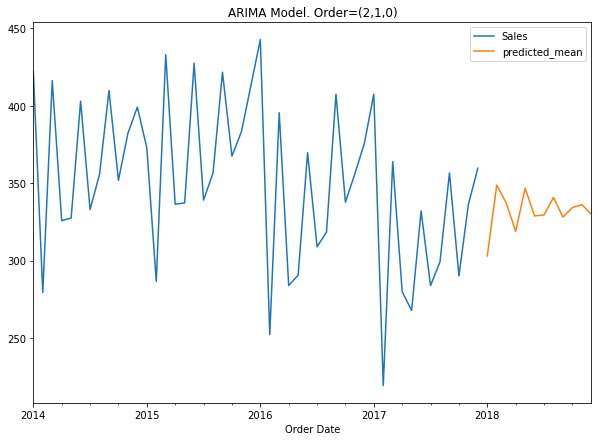

In [76]:
sales.plot(figsize=(10,7),legend=True)
fcast.plot(legend=True)
plt.title(msg)

## SARIMA

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from pandas.tseries.offsets import DateOffset
import itertools

In [78]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(train,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit()
        if results.aic < 115:
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))


print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:100.17034215815286
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:102.06384453551625
SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:93.82055173638516
SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:95.5586154892556
SARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:103.61810835238406
SARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:105.16012473854134
SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:101.68334949995517
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:101.6836116612751
SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:103.29595569374729
SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:83.88217156643339
SARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:95.25375386056423
SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:85.28381336363063
SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:85.28381336363063


In [79]:
p=1; q=1; d=0
m3 = sm.tsa.statespace.SARIMAX(train,order=(p,d,q),seasonal_order=(0,d,q,12)).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   38
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 12)   Log Likelihood                -200.500
Date:                            Thu, 12 May 2022   AIC                            409.000
Time:                                    01:49:03   BIC                            415.550
Sample:                                01-31-2014   HQIC                           411.330
                                     - 02-28-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.001   1023.882      0.000       0.998       1.002
ma.L1         -0.8841      0.093     -9.517      0.000      -1.066      -0.702
ma.S.L12       0.9959      0.243      4.103      0.000       0.520       1.472
sigma2      1241.7861      0.000   6.33e+06      0.000    1241.786    1241.786
===================================================================================
Ljung-Box (L1) (Q):                   2.34   Jarque-Bera (JB):                 0.84
Prob(Q):                              0.13   Prob(JB):                         0.66
Heteroskedasticity (H):               1.59   Skew:                            -0.36
Prob(H) (two-sided):                  0.42   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.77e+21. Standard errors may be unstable.
"""

start = 38, end = 47
                actual   predicted        err
2017-03-31  363.767582  341.988524  21.779058
2017-04-30  279.915544  283.936183  -4.020639
2017-05-31  267.779794  288.932950 -21.153156
2017-06-30  331.964914  321.887902  10.077012
2017-07-31  283.839497  303.000449 -19.160952
2017-08-31  299.142235  306.990674  -7.848439
2017-09-30  356.573799  354.684191   1.889609
2017-10-31  290.053363  314.942003 -24.888641
2017-11-30  336.181501  328.385264   7.796238
2017-12-31  359.606774  332.446194  27.160580


<AxesSubplot:>

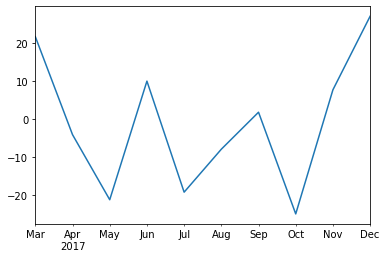

In [80]:
start = len(train)
end = len(train) + len(test) - 1

print('start = {}, end = {}'.format(start,end))

predictions = m3.predict(start=start,end=end,dynamic=True)

df_res = pd.DataFrame({'actual':actual, 'predicted':predictions})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)
df_res.err.plot()

<AxesSubplot:>

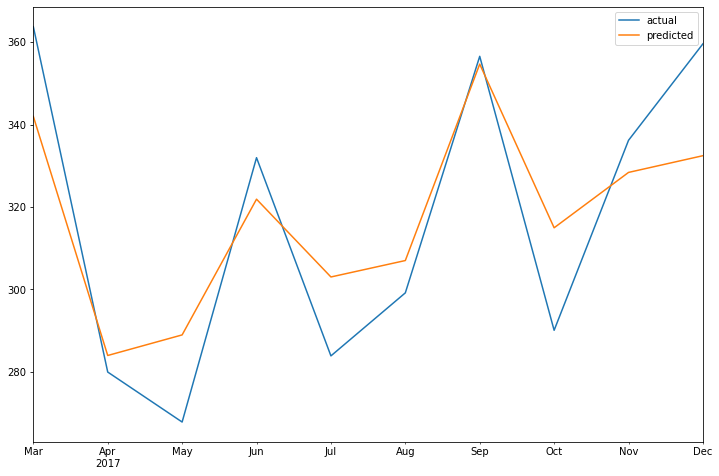

In [81]:
# plot
df_res[['actual','predicted']].plot(figsize=(12,8))

In [82]:
# LJung-Box test

pvalue = sm.stats.acorr_ljungbox(m3.resid,lags=[1])[1][0]
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [83]:
# MSE
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
msg = 'SARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

SARIMA Model. Order=(1,0,1)
	MSE = 288.9728653151023
	RMSE = 16.999201902298303


2017-12-31    359.606774
2018-01-31    319.416889
2018-02-28    277.315177
2018-03-31    338.077273
2018-04-30    317.358651
2018-05-31    303.573020
2018-06-30    328.477209
2018-07-31    305.007459
2018-08-31    313.977856
2018-09-30    321.688212
2018-10-31    300.186693
2018-11-30    326.254821
2018-12-31    341.666820
2019-01-31    320.290744
Freq: M, Name: predicted_mean, dtype: float64


Text(0.5, 1.0, 'SARIMA Model. Order=(1,0,1)')

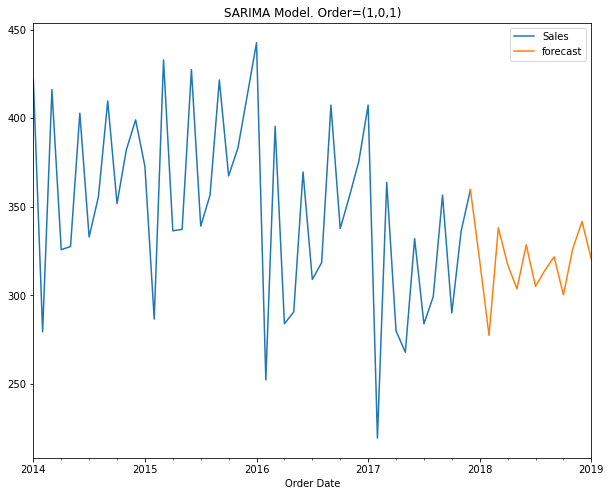

In [84]:
p = 1; d = 0; q = 1
m3_f = sm.tsa.statespace.SARIMAX(sales,order=(p,d,q),seasonal_order=(0,d,q,12)).fit()
fcast = m3_f.predict(start=end, end=len(sales)+12, typ='levels')
fcast[0]=df_res.iloc[-1,0]
print(fcast)

sales.plot(figsize=(10,8),legend=True)
fcast.plot(legend=True,label = 'forecast')
plt.title(msg)

2017-12-31    359.606774
2018-01-31    354.250346
2018-02-28    274.756474
2018-03-31    324.580428
2018-04-30    280.319148
2018-05-31    284.108233
2018-06-30    311.644533
2018-07-31    294.425961
2018-08-31    293.096516
2018-09-30    334.323217
2018-10-31    307.130856
2018-11-30    309.198020
2018-12-31    316.553684
2019-01-31    346.412388
2019-02-28    249.721237
2019-03-31    297.168637
2019-04-30    273.374219
2019-05-31    264.960809
2019-06-30    277.603758
2019-07-31    274.918640
2019-08-31    279.233087
2019-09-30    295.774353
2019-10-31    269.416693
2019-11-30    294.872118
2019-12-31    300.544318
2020-01-31    288.657218
Freq: M, Name: predicted_mean, dtype: float64


Text(0.5, 1.0, 'SARIMA Model. Order=(1,0,1)')

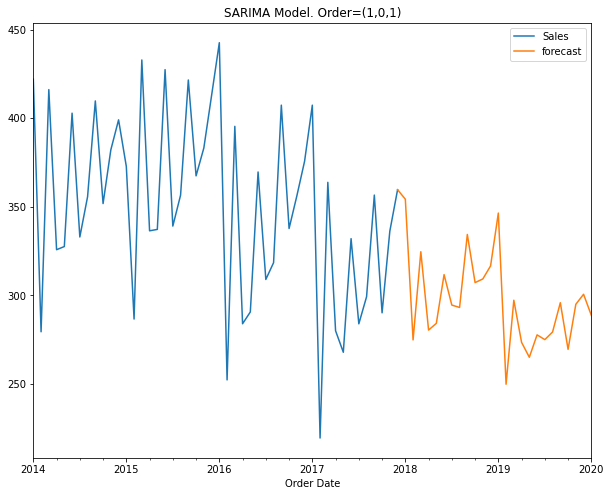

In [85]:
p = 1; d = 0; q = 1
m3_f = sm.tsa.statespace.SARIMAX(sales,order=(p,d,q),seasonal_order=(0,d,q,24)).fit()
fcast = m3_f.predict(start=end, end=len(sales)+24, typ='levels')
fcast[0]=df_res.iloc[-1,0]
print(fcast)

sales.plot(figsize=(10,8),legend=True)
fcast.plot(legend=True,label = 'forecast')
plt.title(msg)

In [90]:
ARMA=[3929.1074180094683,62.682592623546356,412.195,418.746,414.526]
ARIMA=[741.2409418603236,27.225740428137552,499.397,504.947,501.486]
SARIMAX=[288.9728653151023,16.999201902298303,409.000,415.550,411.330]
     

In [92]:
t1=pd.DataFrame(data=zip(ARMA,ARIMA,SARIMAX),columns=['ARMA Model','ARIMA Model','SARIMAX Model'])
t1

,ARMA Model,ARIMA Model,SARIMAX Model
0,3929.107418,741.240942,288.972865
1,62.682593,27.225740,16.999202
2,412.195000,499.397000,409.000000
3,418.746000,504.947000,415.550000
4,414.526000,501.486000,411.330000


In [93]:

t1.index = ['MSE','RMSE','AIC','BIC','HQIC']
t1

,ARMA Model,ARIMA Model,SARIMAX Model
MSE,3929.107418,741.240942,288.972865
RMSE,62.682593,27.225740,16.999202
AIC,412.195000,499.397000,409.000000
BIC,418.746000,504.947000,415.550000
HQIC,414.526000,501.486000,411.330000


In [89]:
sales

,Sales
Order Date,
2014-01-31,422.046429
2014-02-28,279.351025
2014-03-31,416.156973
2014-04-30,325.718400
2014-05-31,327.500263
2014-06-30,402.848514
2014-07-31,332.896952
2014-08-31,355.636713
2014-09-30,409.762092
